<a href="https://colab.research.google.com/github/ejiro-codes/Air-Quality-Index-Analysis/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Global Air Pollution**

<img src="https://cpree.princeton.edu/sites/g/files/toruqf651/files/styles/16x9_750w_422h/public/pages/air-pollution-stsk_150001988.jpg?itok=JYyXokyU" width=600>  
<font size=2 color=gray>Image Credit: Center for Policy Research on Energy and the Environment, Princeton University</font>

Air Pollution is contamination that modifies the natural characteristics of the atmosphere often comes from household combustion devices, motor vehicles, industrial facilities and forest fires. Several pollutants are implicated in health concerns include particulate matter, carbon monoxide, ozone, nitrogen dioxide and sulfur dioxide.

This dataset provides geolocated information about the following pollutants:

Nitrogen Dioxide [NO2] : Nitrogen Dioxide is one of the pollutants coming from cars, trucks and buses emissions, power plants and off-road equipment. Exposure over short periods can aggravate respiratory diseases, like asthma. Longer exposures may contribute to develoment of asthma and respiratory infections. People with asthma, children and the elderly are at greater risk for the health effects of NO2.

Ozone [O3] : The Ozone molecule is harmful for outdoor air quality. It is created by chemical reactions between oxides of nitrogen and volatile organic compounds (VOC). Differently from the good ozone located in the upper atmosphere, ground level ozone can provoke several health problems like chest pain, coughing, throat irritation and airway inflammation. Furthermore it can reduce lung function and worsen bronchitis, emphysema, and asthma. Ozone affects also vegetation and ecosystems. In particular, it damages sensitive vegetation during the growing season.

Carbon Monoxide [CO] : Carbon Monoxide is a colorless and odorless gas. Outdoor, it is emitted in the air above all by cars, trucks and other vehicles or machineries that burn fossil fuels. Such items like kerosene and gas space heaters, gas stoves also release CO affecting indoor air quality. Breathing air with a high concentration of CO reduces the amount of oxygen that can be transported in the blood stream to critical organs like the heart and brain. At very high levels, which are not likely to occur outdoor but which are possible in enclosed environments. CO can cause dizziness, confusion, unconsciousness and death.

Particulate Matter [PM2.5] : Atmospheric Particulate Matter, also known as atmospheric aerosol particles, are complex mixtures of small solid and liquid matter that get into the air. If inhaled they can cause serious heart and lungs problem. They have been classified as group 1 carcinogen by the International Agengy for Research on Cancer (IARC). PM10 refers to those particules with a diameter of 10 micrometers or less. PM2.5 refers to those particles with a diameter of 2.5 micrometers or less.

Here are the descriptions of this dataset:
- `Country` : Name of the country
- `City` : Name of the city
- `AQI Value` : Overall AQI value of the city
- `AQI Category` : Overall AQI category of the city
- `CO AQI Value` : AQI value of Carbon Monoxide of the city
- `CO AQI Category` : AQI category of Carbon Monoxide of the city
- `Ozone AQI Value` : AQI value of Ozone of the city
- `Ozone AQI Category` : AQI category of Ozone of the city
- `NO2 AQI Value` : AQI value of Nitrogen Dioxide of the city
- `NO2 AQI Category` : AQI category of Nitrogen Dioxide of the city
- `PM2.5 AQI Value` : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
- `PM2.5 AQI Category` : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city

Credit: Data source: [elichens](https://www.elichens.com/).

###**Prediction**

Building an ML model to predict AQI value.

### Pip install necessary library to import dataset

In [ ]:
!pip install opendatasets

#### Imports

In [ ]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot

#### Downloading the dataset requires a kaggle account with a key that can be retrieved from account settings

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ejiroigun
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data


100%|██████████| 371k/371k [00:00<00:00, 27.0MB/s]

### Reading dataset

In [ ]:
# Loading the dataset
data="/content/global-air-pollution-data/global_air_pollution_data.csv"
df = pd.read_csv(data)
df

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


# Initial Data Exploration

###### Finding maximums for each category

In [ ]:
df.groupby('aqi_category')['aqi_value'].agg([min, max])

,min,max
aqi_category,,
Good,6,50
Hazardous,300,500
Moderate,51,99
Unhealthy,150,200
Unhealthy for Sensitive Groups,100,149
Very Unhealthy,201,297


In [ ]:
df.groupby('co_aqi_category')['co_aqi_value\t'].agg([min, max])

,min,max
co_aqi_category,,
Good,0,49
Moderate,51,67
Unhealthy for Sensitive Groups,133,133


In [ ]:
df.groupby('ozone_aqi_category')['ozone_aqi_value'].agg([min, max])

,min,max
ozone_aqi_category,,
Good,0,50
Moderate,51,99
Unhealthy,150,200
Unhealthy for Sensitive Groups,100,149
Very Unhealthy,201,235


In [ ]:
df.groupby('no2_aqi_category')['no2_aqi_value'].agg([min, max])

,min,max
no2_aqi_category,,
Good,0,49
Moderate,51,91


In [ ]:
df.groupby('pm2.5_aqi_category')['pm2.5_aqi_value'].agg([min, max])

,min,max
pm2.5_aqi_category,,
Good,0,50
Hazardous,300,500
Moderate,51,99
Unhealthy,150,200
Unhealthy for Sensitive Groups,100,149
Very Unhealthy,201,298


Maximum Values per category
- Good - 50
- Moderate - 99
- Unhealthy for sensitive groups - 149
- Unhealthy - 200
- Very Unhealthy - 299
- Hazardous - 500


In [ ]:
# perform data exploration to understand the data
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


all other columns besides country_name and city_name contain no null values

In [ ]:
# We find that the range of cities representative of a country heavily varies in this dataset
df.groupby('country_name', sort=False)['city_name'].count()

country_name
Russian Federation       1241
Brazil                   1562
Italy                     979
Poland                    389
France                    802
                         ... 
Bahrain                     1
Seychelles                  1
State of Palestine          1
Saint Kitts and Nevis       1
Monaco                      1
Name: city_name, Length: 175, dtype: int64

###### Histogram plots showing the various value distributions within the numerical columns.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



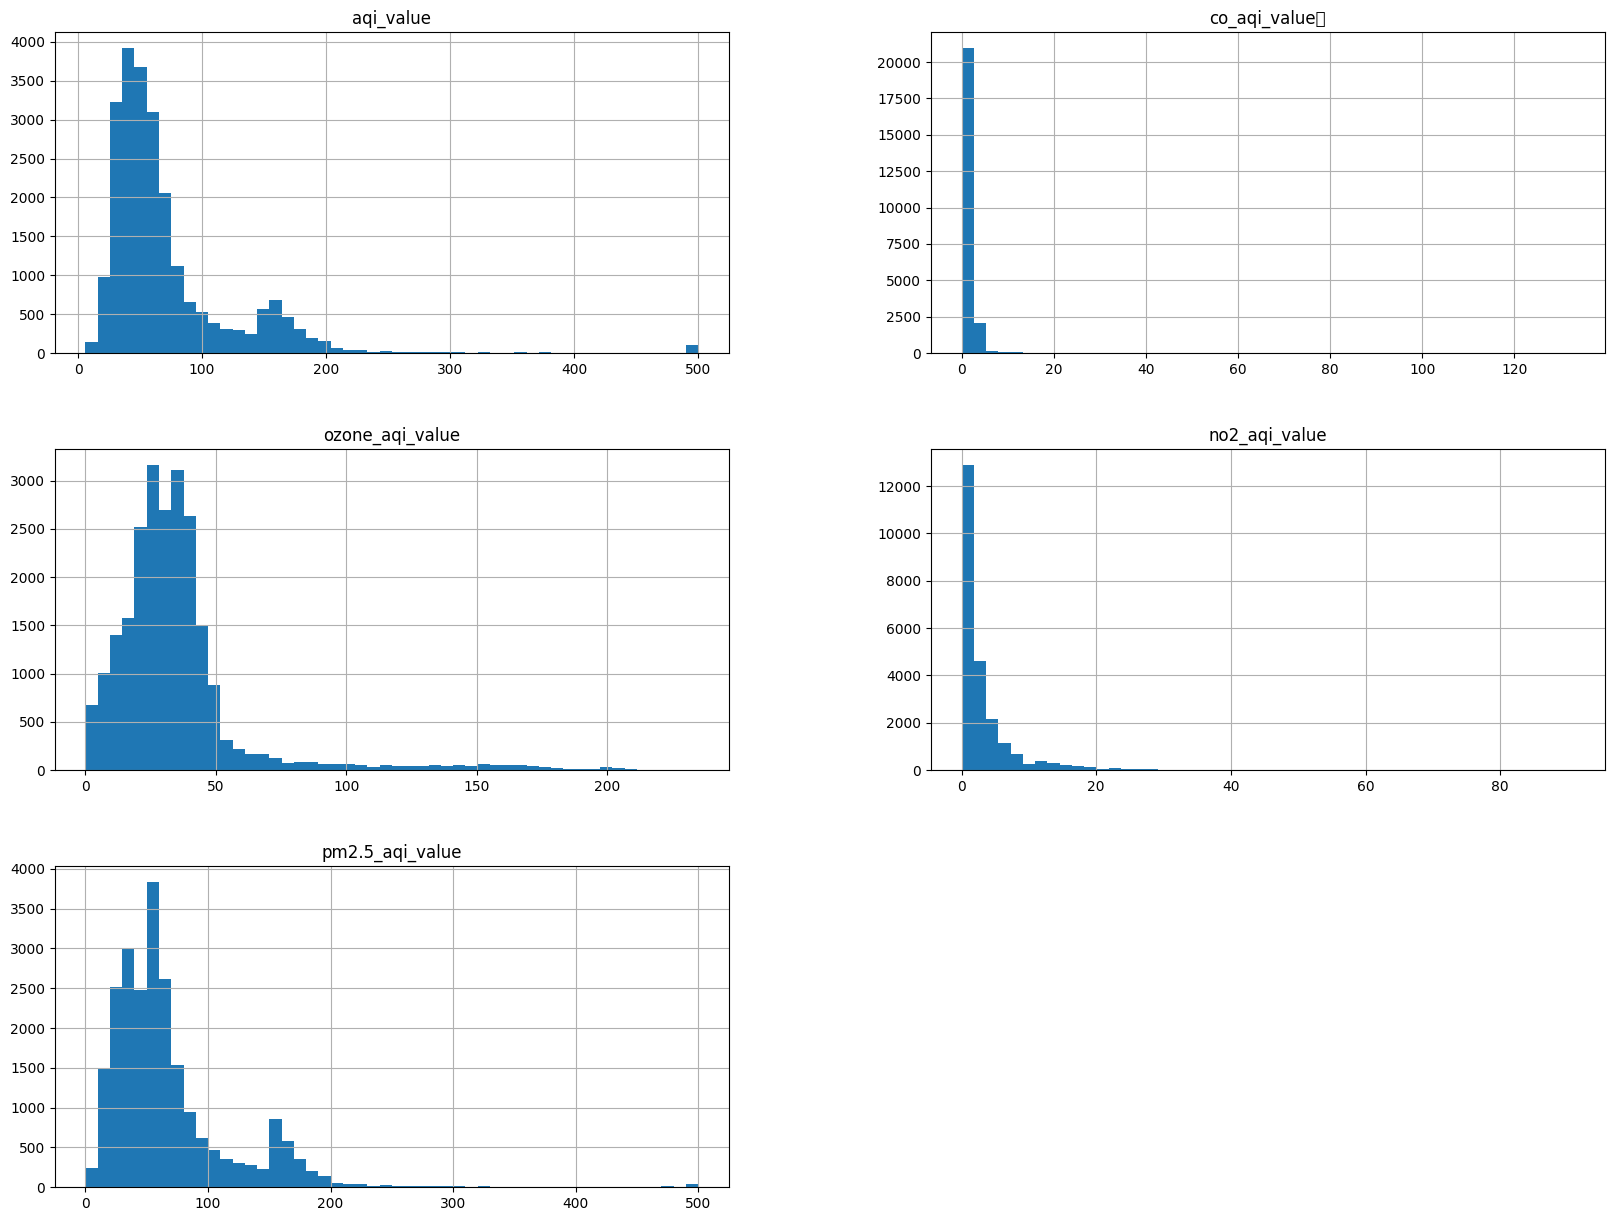

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#visualizing distribution for categorical variables

In [ ]:
for col in list((df.select_dtypes(include=['object']).iloc[:,2:]).columns):
  fig = px.histogram(df, col, color = col)
  fig.show()

In [ ]:
# Renaming the carbon monoxide aqi value to get rid of unnecessary tab space
df = df.rename(columns={'co_aqi_value\t':'co_aqi_value'})
df

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


#### Specifying Numerical and Categorical variables

In [ ]:
cat_columns = ['country_name', 'city_name', 'aqi_category', 'co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category', 'pm2.5_aqi_category']
numeric_cols = ['co_aqi_value','ozone_aqi_value','no2_aqi_value','pm2.5_aqi_value']

#### closeset correlation according to the pairwise plots seems to be with the particle matter column

<Figure size 1200x1200 with 0 Axes>

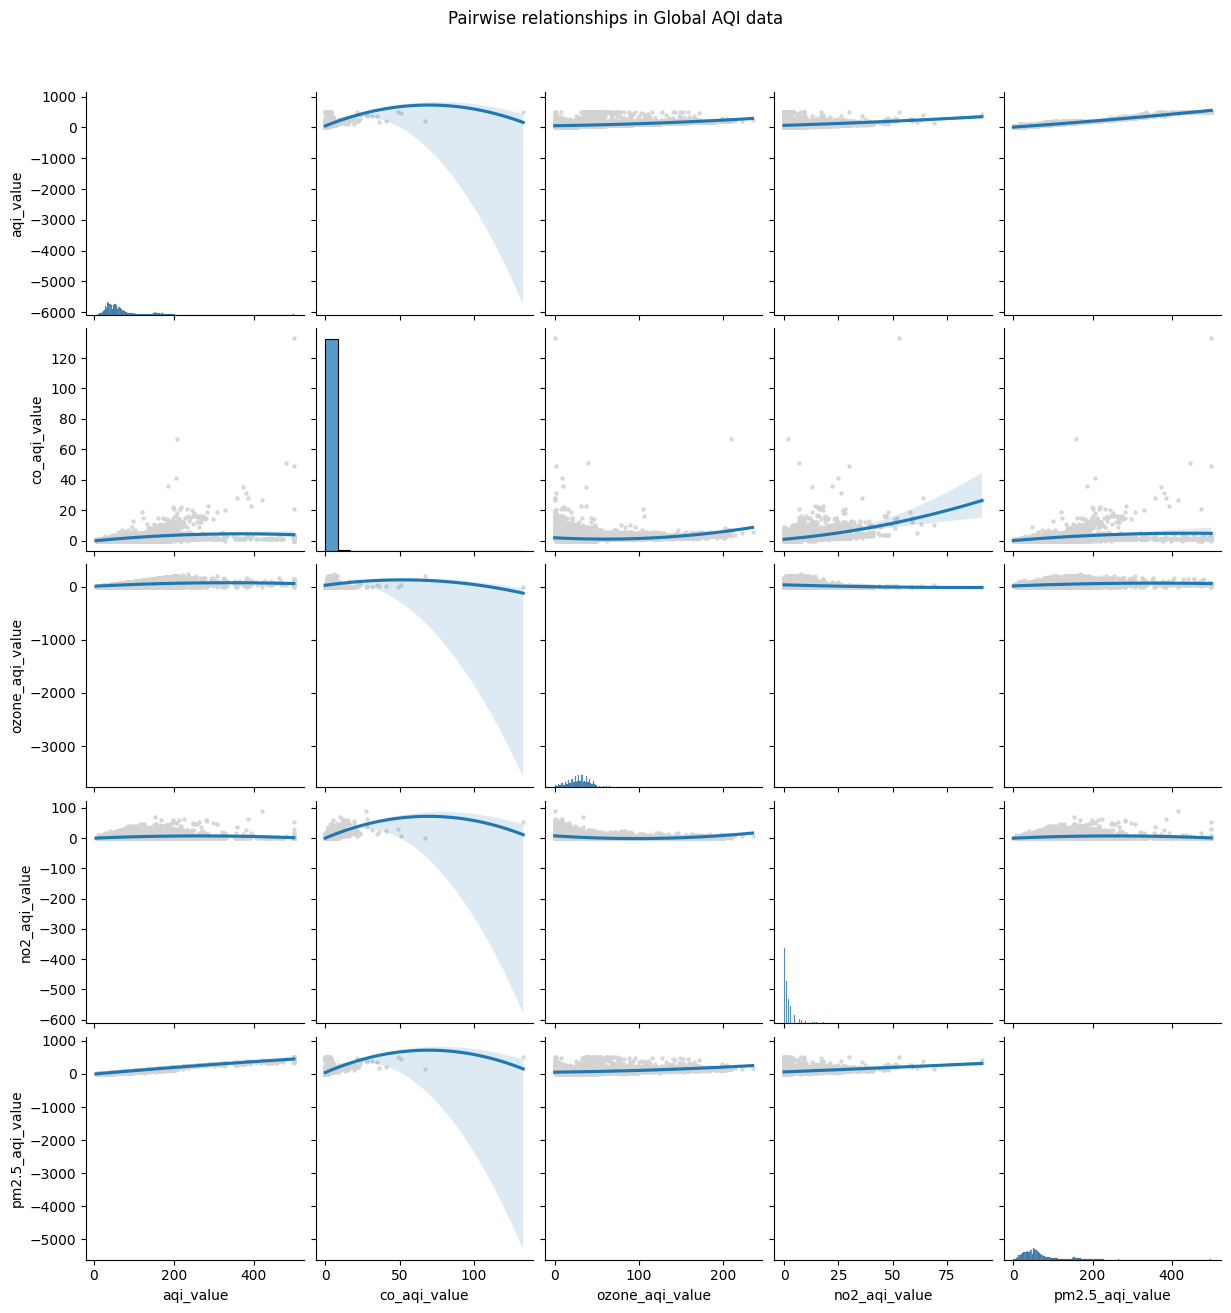

In [ ]:
plt.figure(figsize=(12,12))
g=sns.pairplot(
    data=df.drop(cat_columns, axis=1),
    kind="reg", # regression
    plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order":2},
    height=2.5 # make the individual plots small
);
g.fig.suptitle(
    "Pairwise relationships in Global AQI data", y=1.05
);

In [ ]:
corr_matrix = df.drop(cat_columns, axis=1).corr()
corr_matrix["aqi_value"].sort_values(ascending=False)

aqi_value          1.000000
pm2.5_aqi_value    0.984327
co_aqi_value       0.430602
ozone_aqi_value    0.405310
no2_aqi_value      0.231758
Name: aqi_value, dtype: float64

#### Heatmap visualization of spearman correlation matrix also proving initial point

Text(0.5, 1.1, 'Extremely high correlation between Particulate Matter content and Air Quality index')

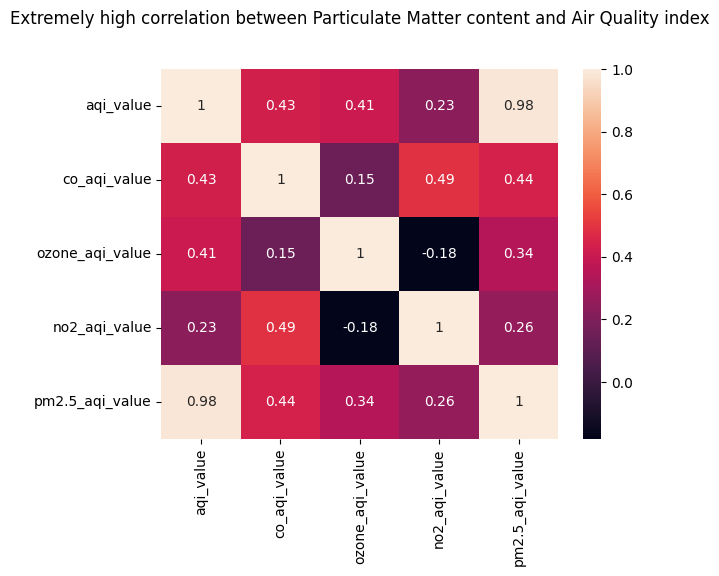

In [ ]:
g = sns.heatmap(
    corr_matrix,
    annot=True
)
# g.fig.suptitle('Extremely high correlation between Particulate Matter content and Air Quality index')
plt.title('Extremely high correlation between Particulate Matter content and Air Quality index', y=1.1)

# Train Test Split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Defining training and test sets with an 80/20 split

In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
17599,Estonia,Rakvere,28,Good,1,Good,28,Good,1,Good,12,Good
21309,Brazil,Rondonopolis,37,Good,1,Good,9,Good,0,Good,37,Good
12645,United States of America,Ottumwa,51,Moderate,1,Good,36,Good,3,Good,51,Moderate
8449,United States of America,South Plainfield,92,Moderate,3,Good,20,Good,19,Good,92,Moderate
316,Brazil,Colatina,45,Good,1,Good,14,Good,2,Good,45,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
11964,India,Dod Ballapur,63,Moderate,0,Good,22,Good,0,Good,63,Moderate
21575,China,Lianzhou,115,Unhealthy for Sensitive Groups,3,Good,40,Good,2,Good,115,Unhealthy for Sensitive Groups
5390,Zimbabwe,Mutoko,52,Moderate,2,Good,13,Good,0,Good,52,Moderate
860,Portugal,Leca Do Bailio,28,Good,0,Good,28,Good,2,Good,20,Good


Ensuring that the random distribution established by the train/test split is representative of the distribution of aqi_values in the original dataset (using aqi_category)

In [ ]:
'''
Getting the distributions of the categories within each of the three current datasets
Achieved by getting the proportion for each category within the said dataset
'''
initial_aqi_dist = df['aqi_category'].value_counts() / len(df['aqi_category'])
train_aqi_dist = train_set['aqi_category'].value_counts() / len(train_set['aqi_category'])
test_aqi_dist = test_set['aqi_category'].value_counts() / len(test_set['aqi_category'])

specifying the possible aqi pollutant categories

In [ ]:
cat_ordering = ['Good','Moderate','Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

In [ ]:
'''
Inserting various distributions into a new dataframe
Melting the dataframe to ensure that each row specifies the origin of the distribution value
Renaming the columns
'''
aqi_dist = pd.DataFrame({'Initial':initial_aqi_dist, 'Train':train_aqi_dist, 'Test':test_aqi_dist})
aqi_dist = aqi_dist.reset_index()
updated_dist = pd.melt(aqi_dist, id_vars=['aqi_category'], value_vars=['Initial','Train','Test'])
updated_dist = updated_dist.rename(columns={'variable':'Dataset', 'value':'Distribution'})
updated_dist

,aqi_category,Dataset,Distribution
0,Good,Initial,0.423475
1,Moderate,Initial,0.393428
2,Unhealthy,Initial,0.094915
3,Unhealthy for Sensitive Groups,Initial,0.067809
4,Very Unhealthy,Initial,0.012232
5,Hazardous,Initial,0.008140
6,Good,Train,0.422056
7,Moderate,Train,0.393926
8,Unhealthy,Train,0.096324
9,Unhealthy for Sensitive Groups,Train,0.067661


Text(0.5, 0.98, 'Categorical AQI Values are equally distributed amongst all Datasets')

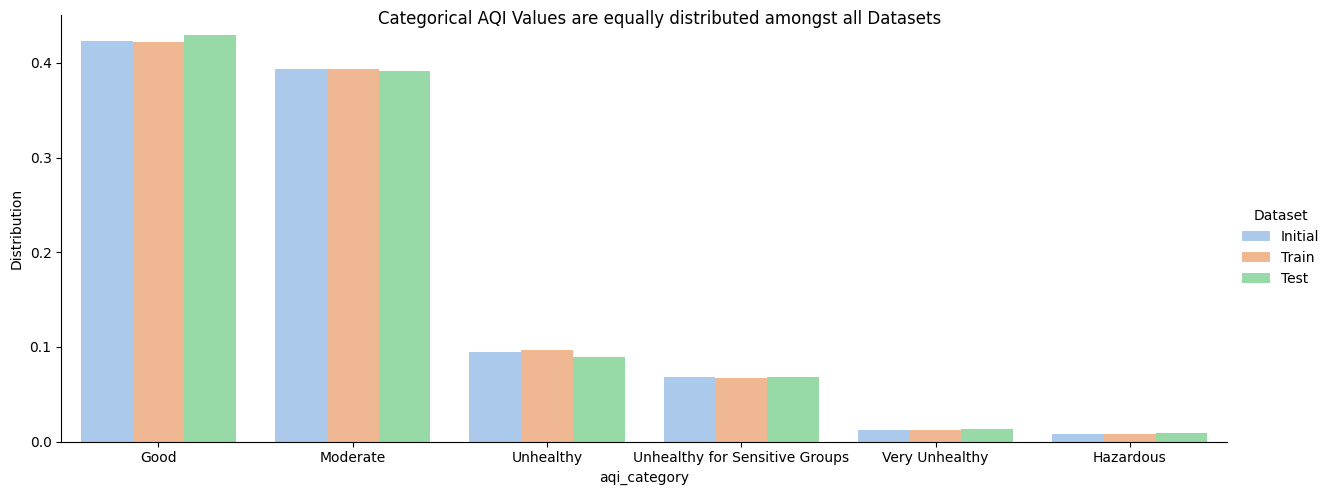

In [ ]:
'''
Seaborn plot to help show variance in distribution
'''
g = sns.catplot(
    updated_dist,
    x='aqi_category',
    y='Distribution',
    kind='bar',
    hue='Dataset',
    palette='pastel',
    aspect = 2.5,
)
g.fig.suptitle('Categorical AQI Values are equally distributed amongst all Datasets')

Testing out the ordinal encoded values

In [ ]:
#ordinal encoding test
ordinal_encoder = OrdinalEncoder(categories=[cat_ordering])
aqi_cat_encoded = ordinal_encoder.fit_transform(df[['aqi_category']])
aqi_cat_encoded[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.]])

In [ ]:
ordinal_encoder.categories_

[array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
        'Very Unhealthy', 'Hazardous'], dtype=object)]

#### Preparing necessary variables for the pipeline

In [ ]:
'''
define labels variable
define training set by dropping label
'''

labels = train_set['aqi_value'].copy()
aqi_train = train_set.drop(['aqi_value'], axis=1)

In [ ]:
'''
Given that we're using ordinal encoding,
we have to specify the order in which we would like the data to be encoded
and given that the "cat_ordering" variable has that specified order
as well as the fact that the ordering is consistent for all our categorical variables,
we can create a 2d array with copies of the same list for all 5 categories
'''

cat_final_order = np.tile(cat_ordering,(5,1))
cat_final_order = list(cat_final_order)

In [ ]:
cat_final_order

[array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
        'Very Unhealthy', 'Hazardous'], dtype='<U30'),
 array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
        'Very Unhealthy', 'Hazardous'], dtype='<U30'),
 array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
        'Very Unhealthy', 'Hazardous'], dtype='<U30'),
 array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
        'Very Unhealthy', 'Hazardous'], dtype='<U30'),
 array(['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy',
        'Very Unhealthy', 'Hazardous'], dtype='<U30')]

# Pipeline

Here we create our transformers and construct our pipelines for data transformation

In [ ]:
'''
We define a transformer that will assist with dropping the unecessary columns from the dataframe
during the transformation process
'''

class ColumnDropTransformer(BaseEstimator,TransformerMixin):
  def __init__(self, columns):
    self.columns = columns

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    return X.drop(self.columns, axis=1) #return the dataframe excluding the specified columns

In [ ]:
class InputterTransformer(TransformerMixin):
  def __init__(self):
    '''
    '''

  def fit(self, X, y=None):
    return self

  # custom transform that updates null categories depending on
  # their numerical values
  def transform(self, X, y=None):
      def find_cat(X):
          def find_new_cat(val):
            if val <= 50:
              return 'Good'
            elif val <= 99:
              return 'Moderate'
            elif val <= 149:
              return 'Unhealthy for sensitive groups'
            elif val <= 200:
              return 'Unhealthy'
            elif val <= 299:
              return 'Very Unhealthy'
            return 'Hazardous'
          if pd.isnull(X['aqi_category']):
            X['aqi_category'] = find_new_cat(X['pm2.5_aqi_value'])

          if pd.isnull(X['co_aqi_category']):
            X['co_aqi_category'] = find_new_cat(X['co_aqi_value'])

          if pd.isnull(X['ozone_aqi_category']):
            X['ozone_aqi_category'] = find_new_cat(X['ozone_aqi_value'])

          if pd.isnull(X['no2_aqi_category']):
            X['no2_aqi_category'] = find_new_cat(X['no2_aqi_value'])

          if pd.isnull(X['pm2.5_aqi_category']):
            X['pm2.5_aqi_category'] = find_new_cat(X['pm2.5_aqi_value'])

          return X
      return X.apply(find_cat, axis=1)


In [ ]:
'''
numerical pipeline includes a simple imputer to fill in null values with the median for a given column
imputer wasn't necessary given that the dataset (excluding the droppped columns) has no null values

Also includes standard scaler for standardization of values in each feature
'''

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


'''
The categorical pipeline initially drops the country name and city name,
applies the simple imputer to replace null values with mean value within aqi_value threshold,
applies ordinal encoding to all columns in the order specified by the "cat_final_order" variable
'''
cat_pipeline = Pipeline([
    ('colDrop', ColumnDropTransformer(['country_name','city_name'])),
    ('inputter', InputterTransformer()),
    ('encode', OrdinalEncoder(categories=cat_final_order)),
])


full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, cat_columns),
])

aqi_prepared =  full_pipeline.fit_transform(aqi_train) #running fitting and transforming the input data

In [ ]:
aqi_prepared

array([[-0.19685063, -0.25903455, -0.39499104, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19685063, -0.93389403, -0.58799311, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19685063,  0.02511682, -0.00898688, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.32754425, -0.79181835, -0.58799311, ...,  0.        ,
         0.        ,  1.        ],
       [-0.72124552, -0.25903455, -0.20198896, ...,  0.        ,
         0.        ,  0.        ],
       [-0.19685063, -0.79181835, -0.58799311, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
'''
concatenating the list of numeric columns with the categorical columns (excluding those that were dropped)
'''
cols = numeric_cols + cat_columns[2:]
cols

['co_aqi_value',
 'ozone_aqi_value',
 'no2_aqi_value',
 'pm2.5_aqi_value',
 'aqi_category',
 'co_aqi_category',
 'ozone_aqi_category',
 'no2_aqi_category',
 'pm2.5_aqi_category']

In [ ]:
'''
creating a new dataframe using the prepared data
'''
aqi_df = pd.DataFrame(
    aqi_prepared,
    columns= cols,
    index=aqi_train.index)
aqi_df.head()

,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value,aqi_category,co_aqi_category,ozone_aqi_category,no2_aqi_category,pm2.5_aqi_category
17599,-0.196851,-0.259035,-0.394991,-1.036646,0.0,0.0,0.0,0.0,0.0
21309,-0.196851,-0.933894,-0.587993,-0.579818,0.0,0.0,0.0,0.0,0.0
12645,-0.196851,0.025117,-0.008987,-0.323995,1.0,0.0,0.0,0.0,1.0
8449,0.851939,-0.543186,3.079046,0.425203,1.0,0.0,0.0,0.0,1.0
316,-0.196851,-0.756299,-0.201989,-0.433633,0.0,0.0,0.0,0.0,0.0


In [ ]:
aqi_train.head(20)

,country_name,city_name,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
17599,Estonia,Rakvere,Good,1,Good,28,Good,1,Good,12,Good
21309,Brazil,Rondonopolis,Good,1,Good,9,Good,0,Good,37,Good
12645,United States of America,Ottumwa,Moderate,1,Good,36,Good,3,Good,51,Moderate
8449,United States of America,South Plainfield,Moderate,3,Good,20,Good,19,Good,92,Moderate
316,Brazil,Colatina,Good,1,Good,14,Good,2,Good,45,Good
12202,Mexico,Panuco,Unhealthy for Sensitive Groups,1,Good,18,Good,3,Good,100,Unhealthy for Sensitive Groups
8833,Russian Federation,Nizhnyaya Salda,Good,1,Good,29,Good,0,Good,28,Good
4991,United States of America,Bellview,Moderate,2,Good,37,Good,8,Good,52,Moderate
6586,Belgium,Geel,Moderate,1,Good,22,Good,8,Good,59,Moderate
8497,Tunisia,Masakin,Unhealthy for Sensitive Groups,1,Good,103,Unhealthy for Sensitive Groups,0,Good,52,Moderate


# Model Training/Testing

In [ ]:
#import all necessary models, metrics and utility functions from sklearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score

In [ ]:
# Initializing Linear regression models
lin_reg = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()

#### Reasons behind model choices
We're currently dealing with a regression problem
- Linear Regression: One of the easier models to work with and very much applicable to the task at hand. Also easier to interpret the results produced and the correlation between the dependent (target) and independent (features) variables
- RandomForestRegressor: Ensemble model that combines runs multiple decision trees that take into account different subsets of the dataset in parallel and select a weighted average as the result.
- Support Vector Regressor: Utilizes support vector machines to establish hyperplanes in n-dimensional spaces (where n is the number of features) that is expected to separate points into differing classes. As opposed to other regression models, this regressor tries to fit the best line within a given threshold.

In [ ]:
'''
display scores function to display score results per model
'''

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

##### cross validation with 12 folds for linear regression model
scoring parameter is negative mean squared error

In [ ]:
scorelr = cross_val_score(lin_reg, aqi_df, labels,scoring="neg_mean_squared_error", cv = 12)
print("Model: Linear Regression")
display_scores(scorelr)

Model: Linear Regression
Scores: [-59.68363422 -42.63143342 -60.41323756 -48.88061982 -53.75407872
 -66.17853919 -60.60803337 -57.81850857 -56.28062319 -58.99099808
 -84.59480258 -63.05176364]
Mean: -59.407189364671005
Standard deviation: 9.715732054434673


##### cross validation with 12 folds for support vector regressor

In [ ]:
scoresvr = cross_val_score(svr, aqi_df, labels,scoring="neg_mean_squared_error", cv = 12)
print("Model: Support Vector Regressor")
display_scores(scoresvr)

Model: Support Vector Regressor
Scores: [-435.97534498 -332.01228316 -398.71617367 -499.63182986 -395.03554709
 -373.53065723 -209.0762385  -771.90484549 -460.34317358 -571.40768611
 -661.40404105 -324.33971984]
Mean: -452.7814617139566
Standard deviation: 148.59983323274167


##### cross validation with 12 folds for random forest regressors

In [ ]:
scorerf = cross_val_score(rf, aqi_df, labels,scoring="neg_mean_squared_error", cv = 12)
print("Model: Random Forest Regressor")
display_scores(scorerf)

Model: Random Forest Regressor
Scores: [-4.09992383 -5.0350878  -4.01075563 -4.75501957 -3.86937168 -0.98961145
 -3.94765064 -2.98526707 -5.08591957 -9.80756017 -6.32249271 -2.74228747]
Mean: -4.470912296908068
Standard deviation: 2.0612531993693377


### Plotting results

Saving the cross-validation scores into a new dataframe for visualization purposes

In [ ]:
# melting to have a column with differing model values for hue
cv_df = pd.DataFrame({'Linear Regression':scorelr, 'Support Vector Regressor':scoresvr, 'Random Forest Regressor':scorerf})
cv_df = pd.melt(cv_df, value_vars=cv_df.columns)
cv_df = cv_df.rename(columns={'variable':'model', 'value':'cv_score'})

### plotting a strip plot to show error dispersion

In [ ]:
fig = px.strip(cv_df, x='cv_score',y='model', color='model')
fig.show()

#Fine-Tuning

#### Random Forest Classifier slightly outperforms standard linear regression.

Using grid search cross validation to fine-tune random forest regressor using different permutations of params

In [ ]:
#defining the different permutations of parameters to test with the model
param_grid = [
    {'n_estimators': [20, 40, 60], 'max_features': [5, 'sqrt', 'log2', None]},
    {'bootstrap': [False], 'n_estimators': [30, 50, 100], 'max_features': [None, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# running grid search 8-fold cv with our randomforestregressor model
grid_search = GridSearchCV(forest_reg, param_grid, cv=8,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(aqi_df, labels)

GridSearchCV(cv=8, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [5, 'sqrt', 'log2', None],
                          'n_estimators': [20, 40, 60]},
                         {'bootstrap': [False], 'max_features': [None, 3, 4],
                          'n_estimators': [30, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#output the best model
print(grid_search.best_estimator_)

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=50,
                      random_state=42)


In [ ]:
# Outputting the different scores of the attempted permutations
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.031289256621535 {'max_features': 5, 'n_estimators': 20}
2.024489886344984 {'max_features': 5, 'n_estimators': 40}
1.9509057784700103 {'max_features': 5, 'n_estimators': 60}
2.528300221413072 {'max_features': 'sqrt', 'n_estimators': 20}
2.5065675084177306 {'max_features': 'sqrt', 'n_estimators': 40}
2.410747681363391 {'max_features': 'sqrt', 'n_estimators': 60}
2.528300221413072 {'max_features': 'log2', 'n_estimators': 20}
2.5065675084177306 {'max_features': 'log2', 'n_estimators': 40}
2.410747681363391 {'max_features': 'log2', 'n_estimators': 60}
2.1807960452395347 {'max_features': None, 'n_estimators': 20}
2.1462357546362867 {'max_features': None, 'n_estimators': 40}
2.0956153239811286 {'max_features': None, 'n_estimators': 60}
2.452093179146936 {'bootstrap': False, 'max_features': None, 'n_estimators': 30}
2.449785145653712 {'bootstrap': False, 'max_features': None, 'n_estimators': 50}
2.458430257066616 {'bootstrap': False, 'max_features': None, 'n_estimators': 100}
2.2842340721727

personal note: all models seem to return decent scores regardless

In [ ]:
# printing
sorted(zip(grid_search.best_estimator_.feature_importances_, list(aqi_df.columns)), reverse=True)

[(0.4378841573130311, 'aqi_category'),
 (0.3324005716595606, 'pm2.5_aqi_value'),
 (0.17421877846043768, 'pm2.5_aqi_category'),
 (0.025413842214930874, 'ozone_aqi_value'),
 (0.023791613420617672, 'co_aqi_value'),
 (0.005132632443153745, 'ozone_aqi_category'),
 (0.0010825607480762502, 'no2_aqi_value'),
 (5.849805867843032e-05, 'co_aqi_category'),
 (1.734568151366243e-05, 'no2_aqi_category')]

# Test Set

In [ ]:
final_model = grid_search.best_estimator_
# creating the feature set and labels for test set
X_test = test_set.drop("aqi_value", axis=1)
y_test = test_set["aqi_value"].copy()


# applying transformation procedures defined in pipeline to feature set
X_test_prepared = full_pipeline.transform(X_test)

#obtaining list of predictions from final random forest model
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [ ]:
final_rmse #printing final root mean squared error

2.367311271956593

In [ ]:
final_mse #printing mean squared error

5.604162658332743

In [ ]:
# percentage of points that are explained by the regression model
# How well does the model expained observed data?
r2_score(y_test, final_predictions)

0.9982413585020677

In [ ]:
test_pred_df = pd.DataFrame({'predicted':final_predictions, 'actual':y_test})
test_pred_df

,predicted,actual
11972,58.00,58
3274,21.92,22
20011,47.00,47
3501,80.04,80
14752,21.00,21
...,...,...
4049,71.04,71
9356,54.00,54
795,160.88,161
396,57.00,57


### Comparing predicted models to actual values

The actual vs fitted/predicted graph visualizes how close the predicted results are to the actual values

In [ ]:
#defining plotly scatter plot with actual on x and predicted on y
fig = px.scatter(test_pred_df, x='actual', y='predicted',opacity=0.6, title='Model is able to predict lower aqi values (Good - moderate category) more precisely than higher ones')

#adjusting plot to add borders around markers to improve visibility
fig.update_traces(marker=dict(size=5,
                              line=dict(width=2,
                                        color='orange')),
                  selector=dict(mode='markers'))

fig.show()